<a href="https://colab.research.google.com/github/smmurdock/Neural-Network-Seedling-Images/blob/main/d604_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
cd /content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images

/content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 1 - Neural Networks/images


## A. Scenario Selection

### A1. Research Question

> Provide one research question that you will answer using neural network models and computer vision techniques. Be sure the research question is relevant to a real-world organizational situation related to the images, video, and audio captured in your chosen dataset.

**Research Question:** Can a deep learning/neural network model be trained on a dataset of RGB images to accurately classify 12 different species of plant seedlings, thereby providing an effective automated solution for botanists and farmers to differentiate between crops and weeds?

### A2. Objectives or Goals

> Define the objectives or goals of the data analysis. Be sure each objective or goal is reasonable within the scope of the research question and is represented in the available data.

The primary objectives for this project are:

* **Prepare the Dataset:** Load and preprocess the 4,750 RGB images and their corresponding labels. This includes normalizing the pixel values and splitting the data into training, validation, and testing sets to ensure the model can be properly trained and evaluated.

* **Develop a Classification Model:** Build, train, and fine-tune a neural network that can learn the distinct visual features of the 12 different plant species from the provided images.

* **Evaluate Model Performance:** Assess the final model's ability to accurately classify the seedling images using key performance metrics such as accuracy, precision, and recall. The goal is to determine the model's effectiveness for this real-world task.

### A3. Neural Network Type

> Identify an industry-relevant type of neural network capable of performing an image, audio, or video classification task that can be trained to produce useful predictions on image sequences on the selected dataset.

For the task of classifying plant seedlings from the provided dataset of RGB images, the most suitable and **industry-relevant** type of neural network is a **Convolutional Neural Network (CNN)**.

This choice is based on the specific requirements of the task and the nature of the data. The prompt asks for a network capable of performing an **image classification task**, and CNNs are the gold standard for this purpose. They are specifically designed to process and learn from pixel data, making them exceptionally effective at identifying the complex patterns, textures, and shapes that distinguish one image from another.

### A4. Neural Network Justification

> Justify your choice of neural network in part A3.


In an industrial or commercial context—whether in agricultural tech, medical imaging, or autonomous systems—CNNs are the go-to solution for computer vision challenges. Their ability to automatically extract hierarchical features from images (from simple edges to complex shapes like leaves) makes them powerful and adaptable. Therefore, a CNN is not just a capable choice; it is the most professionally relevant and proven type of neural network for training on this image dataset to produce useful, real-world predictions.

**Convolutional Neural Network (CNN)** is the ideal choice for this task for several key reasons:

* **Hierarchical Feature Extraction:** CNNs are specifically designed to process image data. They automatically learn a hierarchy of features, starting with simple edges and colors in the initial layers and building up to more complex features, like leaf shapes and textures, in deeper layers. This is essential for identifying the subtle visual differences between the 12 seedling species.
Parameter Efficiency: Unlike standard neural networks, CNNs use shared weights and pooling layers. This drastically reduces the total number of parameters in the model, making it more computationally efficient and less likely to overfit the training data—a critical advantage for a dataset of this size (4,750 images).

* **Spatial Invariance:** The architecture of a CNN provides a degree of translational invariance, meaning it can recognize a plant or a feature even if its position or orientation in the image varies. This makes the model robust and better able to generalize from the training images to new, unseen images of seedlings.

* **Proven Effectiveness:** The scenario notes that the past decade has seen substantial progress in image analysis using neural networks. CNNs are the state-of-the-art architecture that has driven this progress, consistently achieving top performance on image classification tasks across various industries.


## B. Image Dataset

> Perform exploratory data analysis on the chosen image dataset and provide screenshots of the following:

### B1. Exploratory Data Analysis (EDA)

In [33]:
# --- Environment Setup ---
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set visualization style
sns.set(style="whitegrid")

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

**Load the Dataset**

The dataset consists of two files:
- `images.npy`: Contains 4,750 RBG images in numpy array format
- `labels.csv`: Contains the corresponding labels for each image

In [34]:
# --- Load the data ---
images = np.load('images.npy')
labels = pd.read_csv('labels.csv')

#### B1a. Data Visualization

> Provide a visualization for the distribution of the different classes

In this section, we perform exploratory data analysis on the plant seedling
dataset to understand the distribution of images across the 12 different
plant species classes. This analysis helps us identify any potential class
imbalance issues that may need to be addressed during model training.

In [35]:
# --- Display basic information about the dataset ---
print("Dataset Overview:")
print("=" * 60)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"\nColumn names: {labels.columns.tolist()}")
print(f"Unique classes: {labels['Label'].nunique()}")
print(f"\nFirst 10 labels:")
labels.head(10)

Dataset Overview:
Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)

Column names: ['Label']
Unique classes: 12

First 10 labels:


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


**Class Distribution Analysis**

We analyze the distribution of images across all 12 plant species to understand whether the dataset is balanced or if certain classes are over/under-represented.

In [36]:
# -- Class Distribution Analysis ---
# Get the value counts for each class
class_distribution = labels.iloc[:, 0].value_counts()

print("Class Distribution Summary:")
print("=" * 60)
print(class_distribution)

print("\n" + "=" * 60)
print(f"Total images: {class_distribution.sum()}")
print(f"Number of classes: {len(class_distribution)}")
print(f"Mean images per class: {class_distribution.mean():.2f}")
print(f"Standard deviation: {class_distribution.std():.2f}")
print(f"Min: {class_distribution.min()} | Max: {class_distribution.max()}")

Class Distribution Summary:
Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

Total images: 4750
Number of classes: 12
Mean images per class: 395.83
Standard deviation: 154.22
Min: 221 | Max: 654


**Class Balance Analysis:**

To assess whether the dataset has class imbalance issues, we calculate the balance ratio (minimum class count / maximum class count). A ratio closer to 1.0 indicates better balance.

In [37]:
# --- Class Balance Analysis ---
# Calculate balance metrics
balance_ratio = class_distribution.min() / class_distribution.max()

print("Class Balance Analsysis:")
print("=" * 60)
print(f"Balance ratio (min/max): {balance_ratio:.3f}")
print(f"Range (max - min): {class_distribution.max() - class_distribution.min()}")

# Provide interpretation
if balance_ratio > 0.8:
    balance_status = "Well-balanced"
    recommendation = "No special handling required."
elif balance_ratio > 0.5:
    balance_status = "Moderately imbalanced"
    recommendation = "Consider class weightd or oversampling minor classes (augmentation)."
else:
    balance_status = "Significantly imbalanced"
    recommendation = "Strongly recommend class weights and targeted augmentation."


print(f"\nStatus: {balance_status}")
print(f"Recommendation: {recommendation}")

Class Balance Analsysis:
Balance ratio (min/max): 0.338
Range (max - min): 433

Status: Significantly imbalanced
Recommendation: Strongly recommend class weights and targeted augmentation.


**Visualization: Class Distribution Bar Chart**

The following bar chart visualizes the number of images in each of the 12 plant species categories. The red dashed line represents the mean number of images per class.

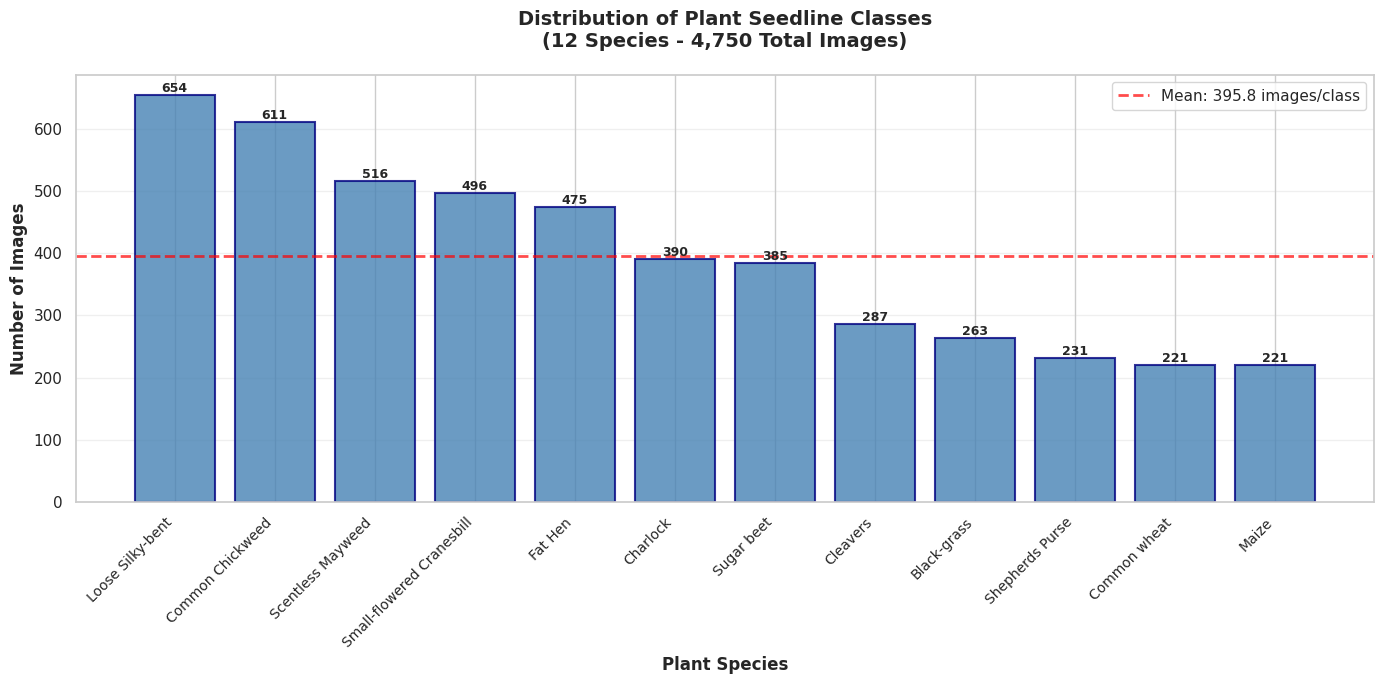

In [38]:
# --- Plot the distribution of classes to check for imbalance ---
# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Create bars
bars = ax.bar(range(len(class_distribution)),
              class_distribution.values,
              color='steelblue',
              edgecolor='navy',
              alpha=0.8,
              linewidth=1.5)

# Customize the plot
ax.set_xlabel('Plant Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Plant Seedline Classes\n(12 Species - 4,750 Total Images)',
             fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(class_distribution)))
ax.set_xticklabels(class_distribution.index, rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar, value in zip(bars, class_distribution.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean line
mean_value = class_distribution.mean()
ax.axhline(y=mean_value, color='red', linestyle='--', linewidth=2,
           label=f'Mean: {mean_value:.1f} images/class', alpha=0.7)
ax.legend(loc='upper right', fontsize=11)

# Grid
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Save image
fig.savefig('class_distribution.png', dpi=300)

**Key Findings:**

Based on the class distribution analysis:

* The dataset containts 4,750 images across 12 plant species.
* The average number of images per class is 395.8.
* Class balance ratio: 0.338

**Implications for Model Training:**

We will need to augment the data to fix the class balance ratio as part of our preprocessing to be ready for training a neural network.

#### B1b. Sample Images

> Provide sample images with associated labels

To better understand the visual characteristics of each plant species in our dataset, we display sample images from each of the 12 classes. This visualization helps identify visual patterns, image quality, and potential issues in classification.

Displaying sample images from 12 plant species classes:
Total images in dataset: 4750


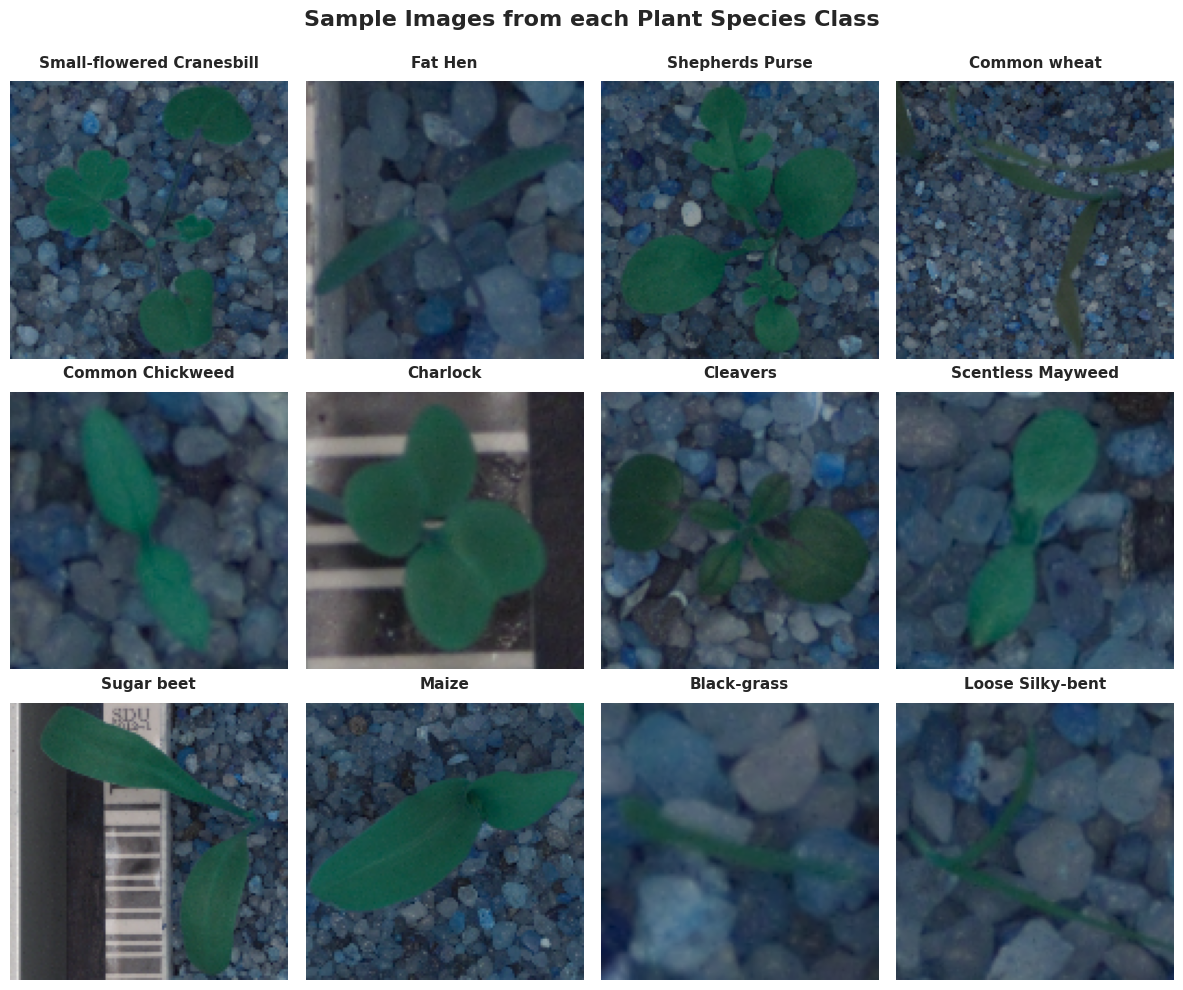

In [39]:
# --- Get Unique Classes ---
unique_classes = labels['Label'].unique()
n_classes = len(unique_classes)

print("=" * 60)
print(f"Displaying sample images from {n_classes} plant species classes:")
print(f"Total images in dataset: {len(images)}")
print("=" * 60)

# --- Display one sample image from each class ---
fig, axes = plt.subplots(3, 4, figsize=(12, 10))
fig.suptitle('Sample Images from each Plant Species Class', fontsize=16,
             fontweight='bold', y=0.995)

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate through each class and display a random sample image
for idx, class_name in enumerate(unique_classes):
    # Get indices for this class
    class_indices = labels[labels['Label'] == class_name].index.tolist()

    # Randomly select one image from this class
    sample_idx = random.choice(class_indices)
    sample_image = images[sample_idx]

    # Display the image
    axes[idx].imshow(sample_image)
    axes[idx].set_title(f'{class_name}', fontsize=11, fontweight='bold',
                        pad=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('sample_images_per_class.png', dpi=300)

### B2. Data Augmentation and Justification

> Perform data augmentation and justify the steps taken to augment the images.

To address the significant class imbalance in our dataset, we will use **data augmentation**. This technique artificially expands the dataset by creating modified copies of the existing images. By applying random transformations, we can teach the model to generalize better and prevent it from becoming biased towards the more dominant classes. It also makes our model more robust by training it on a wider variety of image variations, which helps prevent _overfitting_, where the model learns the data too well to be of use for new, unseen data (Awan, 2024).

Instead of augmenting all images, we will specifically **oversample the minority classes**.

The process is as follows:

1. Identify the number of images in the majority class (the class with the most samples).

2. For each minority class, we will generate new, augmented images until its sample count matches the majority class.

3. The majority class itself will not be augmented.

This method ensures that our final training dataset is perfectly balanced, preventing the model from developing a bias towards the more dominant classes. It also makes our model more robust by training it on a wider variety of image variations (Rokem, 2024).

Here are the specific augmentation techniques we'll use:

* **Rotation:** Seedlings in the real world are not always perfectly upright. Randomly rotating the images (up to 40 degrees) helps the model learn to recognize a plant regardless of its orientation.

* **Width and Height Shift:** This shifts the image horizontally or vertically. It simulates the effect of the plant not being perfectly centered in the frame.

* **Shear Transformation:** A shear transformation slants the shape of the image. This mimics what happens when a photo is taken from a slight angle, rather than directly overhead.

* **Zoom:** Randomly zooming in on images forces the model to learn to identify seedlings from different distances.

* **Horizontal and Vertical Flips:** Flipping the images horizontally and vertically creates believable variations of the original images, as a plant can be viewed from its mirror angle.

* **Fill Mode:** When a transformation like a rotation occurs, some pixels might be left empty. We'll use the `'nearest'` fill mode, which fills these empty areas with the nearest pixel values, creating a seamless image.

We'll implement this using Python and TensorFlow's `ImageDataGenerator()`.

---

**Resource:** [ImageDataGenerator (TensorFlow)](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [40]:
# --- Additional Environment Configuration ---
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings from the image generator
warnings.filterwarnings("ignore", category=UserWarning)

In [41]:
# --- Define Augmentation ---
# (TensorFlow Documenation - ImageDataGenerator)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [42]:
# --- Perform Oversampling / Adding Augmentated Data to Minority Classes ---
# Use .iloc[:, 0] to get the first. column as a pandas Series
labels_series = labels.iloc[:, 0]
class_counts = labels_series.value_counts()
max_samples = class_counts.max()

print(f"The majority class ('{class_counts.index[0]}') has {max_samples} samples.")

# These lists will hold the new, balanced data
X_balanced_list = []
y_balanced_text_list = []

# Loop through each unique species name
for species_name in class_counts.index:
    # Get all images for the current species
    class_indices = np.where(labels_series == species_name)[0]
    X_class = images[class_indices]

    # Add the original images of this class to the balanced list
    X_balanced_list.extend(X_class)
    y_balanced_text_list.extend([species_name] * len(X_class))

    # Calculate how many new images are needed to match the majority class
    n_to_generate = max_samples - len(X_class)

    if n_to_generate > 0:
        # Generate new images
        i = 0
        for batch in datagen.flow(X_class, batch_size=1):
            X_balanced_list.append(batch[0])
            y_balanced_text_list.append(species_name)
            i += 1
            if i >= n_to_generate:
                break # Stop when we have enough new images


# Convert the lists back to NumPy arrays
images_balanced = np.array(X_balanced_list, dtype=np.uint8)
labels_balanced_text = np.array(y_balanced_text_list)

The majority class ('Loose Silky-bent') has 654 samples.


In [43]:
# --- Verification of New Balanced Dataset ---
print("New distribution of classes in the balanced dataset:")
print(pd.Series(labels_balanced_text).value_counts())
print(f"\nTotal number of images in the new balanced dataset: {len(images_balanced)}")

New distribution of classes in the balanced dataset:
Loose Silky-bent             654
Common Chickweed             654
Scentless Mayweed            654
Small-flowered Cranesbill    654
Fat Hen                      654
Charlock                     654
Sugar beet                   654
Cleavers                     654
Black-grass                  654
Shepherds Purse              654
Common wheat                 654
Maize                        654
Name: count, dtype: int64

Total number of images in the new balanced dataset: 7848


In the cell below, we'll select a single image from our dataset to use as an example. Then, we'll use the `datagen` object we already created to generate a batch of randomly transformed versions of that single image. Finally, we'll plot them in a grid to see the results. This helps confirm that the transformations are being applied as we expect and gives a good feel for what the model will see during training.

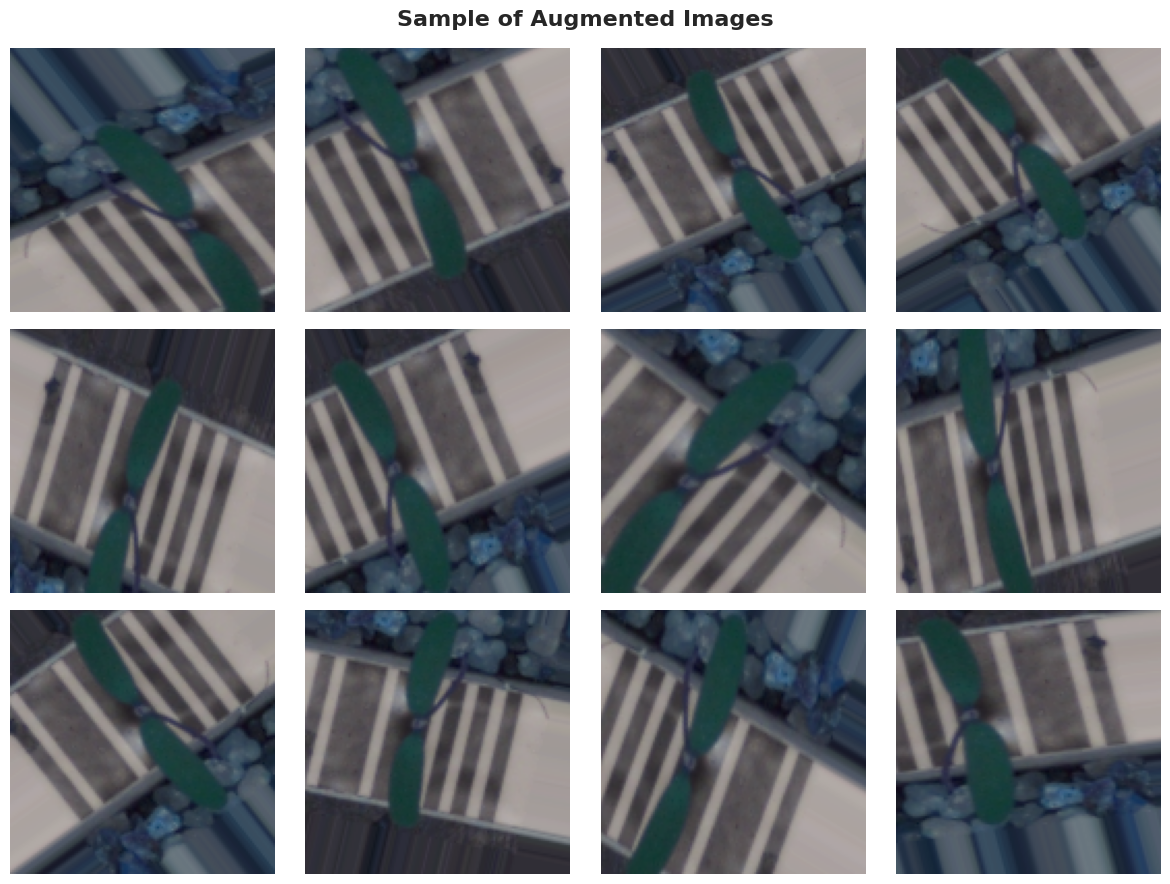

In [44]:
# --- Visualize a Sample of Augmented Images ---
# Pick a single sample image to visualize (the index chosen is arbitrary)
sample_image = images_balanced[2710]

# Reshape to (1, height, width, channels) for the generator
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Create a 3x4 grid for visualizations
fig, axes = plt.subplots(3, 4, figsize=(12,9))
fig.suptitle('Sample of Augmented Images', fontsize=16, fontweight='bold')

# Generate and plot 12 augmented images
i = 0
for batch in datagen.flow(sample_image_expanded, batch_size=1):
    # tThe datagen.flow() method returns batches of augmented images
    # Convert it to an unsigned 8-bit integer type for display
    img = (batch[0]).astype('uint8')

    # Plot the image in the grid
    ax = axes[i // 4, i% 4]
    ax.imshow(img)
    ax.axis('off') # Hide the axes

    i += 1
    if i >= 12:
        break # Stop after generating 12 images


plt.tight_layout()
plt.show()

# Save image
fig.savefig('augmented_samples.png', dpi=300)

### B3. Normalization Steps

> Normalize the images and discuss the steps taken for normalization.

Before we feed our image data into the neural network, we need to **normalize** it. In their raw form, the pixels in our images have values ranging from 0 to 255, representing the intensity of the red, green, and blue (RGB) channels.

Normalizing this data is important for a couple of key reasons:

1. **Faster Convergence:** Neural networks train more efficiently when the input data is scaled to a small, standard range. Large input values can slow down the learning process, as the model's weights have to adjust to a much wider range of numbers.

2. **Improved Model Performance:** By scaling all the pixel values to be between 0 and 1, we ensure that each feature (in this case, each pixel) contributes equally to the model's learning. This prevents any single pixel with a very high value from disproportionately influencing the network's calculations.

The process is simple: we divide every pixel value in our dataset by `255.0`. This will scale the entire dataset from `[0, 255]` to the desired `[0, 1]` range.

In [45]:
# --- Normalize the Image Data ---
# Normalize pixel values to be between 0 and 1
images_normalized = images_balanced.astype('float32') / 255.0

# Verify the results by checking the min and max values
print(f"Minimum pixel value after normalization: {images_normalized.min()}")
print(f"Maximum pixel value after normalization: {images_normalized.max()}")
print(f"Mean pixel value after normalization: {images_normalized.mean():.4f}")
print(f"Shape of dataset: {images_normalized.shape}")

Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0
Mean pixel value after normalization: 0.2748
Shape of dataset: (7848, 128, 128, 3)


### B4. Train-Validation-Test Split

> Perform a train-validation-test split and justify your selection of the proportions for the split.

To properly train and evaluate our neural network, we must split our dataset into three distinct subsets: a **training set**, a **validation set**, and a **test set**. This separation is crucial for developing a model that generalizes well to new, unseen data and for accurately assessing its performance.

We will use a **70/15/15 split**, which means:

* **Training Set (70%):** This is the largest portion of the data and is used to train the model. The network learns the underlying patterns and features of the seedling images from this set by adjusting its internal weights.

* **Validation Set (15%):** This subset is used to fine-tune the model's hyperparameters and monitor its performance during the training process. By evaluating the model on data it hasn't been trained on, we can check for overfitting (when the model memorizes the training data but can't generalize to new, unseen data).

* **Test Set (15%):** This final, completely unseen set of data is used only after the model has been fully trained. It provides the most objective and unbiased measure of the model's true performance on real-world data.

This 70/15/15 distribution is a standard practice that provides enough data for robust training while reserving sufficient data for proper validation and a final, conclusive test.

Using the `train_test_split` method from **Scikit-Learn** allows a split up to four ways (X_train, X_test, y_train, y_test), so we will be applying it twice because we can't split it six ways (X_train, X_val, X_test, y_train, y_val, y_test) all in one go. We'll start by sectioning off the 70% reserved for the training data, leaving 30% to be used for validation and testing, referred to as `X_temp` and `y_temp` to start. Then the remaining 30% temp data will be split 50/50 to create our validation and test sets.

Even though we balanced our dataset in the previous step, we will still perform a **stratified split**. This technique ensures that the proportion of each seedling class is identical across all three sets (training, validation, and test), which is a best practice for robust model evaluation.

In [46]:
# --- Perform a Stratified Train-Validation-Test Split (70/15/15) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use 'images_normalized' and 'labels_balanced_text' from previous steps for splitting
# To stratify with text labels, we need to encode them to integers first
temp_encoder = LabelEncoder()
temp_labels_integer = temp_encoder.fit_transform(labels_balanced_text)

# --- Train + Temp Split (70/30) ---
X_train, X_temp, y_train_text, y_temp_text = train_test_split(
    images_normalized,
    labels_balanced_text,
    test_size=0.30,
    random_state=42,
    stratify=temp_labels_integer
)

# Create a temporary integer encoding of y_temp_text for the second split's
# stratification
temp_labels_integer_temp = temp_encoder.transform(y_temp_text)

# --- Convert Temp to Validation + Testing (50/50) ---
# Split the 30% temporary set into validation and test sets (15% each of total)
X_val, X_test, y_val_text, y_test_text = train_test_split(
    X_temp,
    y_temp_text,
    test_size=0.50,
    random_state=42,
    stratify=temp_labels_integer_temp
)

In [47]:
# --- Verify the splits ---
print("=" * 60)
print("Data splitting complete.")
print(f"Training set shape:    {X_train.shape}, Labels shape: {y_train_text.shape}")
print(f"Validation set shape:  {X_val.shape}, Labels shape: {y_val_text.shape}")
print(f"Test set shape:        {X_test.shape}, Labels shape: {y_test_text.shape}")
print("=" * 60)

Data splitting complete.
Training set shape:    (5493, 128, 128, 3), Labels shape: (5493,)
Validation set shape:  (1177, 128, 128, 3), Labels shape: (1177,)
Test set shape:        (1178, 128, 128, 3), Labels shape: (1178,)


### B5. Target Encoding

> Encode the target feature appropriately for all your datasets and discuss the steps taken.

Our labels are currently text strings (e.g. "Maize," "Fat Hen"), but a neural network requires numerical input. One-hot encoding converts these text labels into a binary format that the model can understand without assuming any order or relationship between the different species.

This process involves two main steps:

1. **Label Encoding**: We convert each unique class name into a unique integer (e.g., 0, 1, 2...). This is necessary for the `stratify` option in the train-test split function.

2. **One-Hot Encoding:** We then transform these integers into a binary vector where each class is represented by a column. For any given sample, the column corresponding to its class with be `1` and all other columns will be `0`.

This encoding prevents the model from assuming a false order or relationship between the classes.

---

**Resource:** [TensorFlow Documentation - to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [48]:
# --- Encode the Target Feature for All Datasets ---
# (TensorFlow Documentation - to_categorical)
from tensorflow.keras.utils import to_categorical

# 1. Initialize and fit the LabelEncoder on the training data
final_encoder = LabelEncoder()
y_train_integer = final_encoder.fit_transform(y_train_text)

# 2. Transform the validation and test labels using the same fitted encoder
y_val_integer = final_encoder.transform(y_val_text)
y_test_integer = final_encoder.transform(y_test_text)

# 3. Perform One-Hot Encoding on all three integer-encoded sets
y_train = to_categorical(y_train_integer)
y_val = to_categorical(y_val_integer)
y_test = to_categorical(y_test_integer)

# --- Verification ---
print("Label encoding complete.")
print(f"Shape of X_train:           {X_train.shape}")
print(f"Shape of X_val:             {X_val.shape}")
print(f"Shape of X_test:            {X_test.shape}")
print(f"Shape of y_train (one-hot): {y_train.shape}")
print(f"Shape of y_val (one-hot):   {y_val.shape}")
print(f"Shape of y_test (one-hot):  {y_test.shape}")

print("\nSample of the first 5 one-hot encoded training labels:")
print(y_train[:5])

Label encoding complete.
Shape of X_train:           (5493, 128, 128, 3)
Shape of X_val:             (1177, 128, 128, 3)
Shape of X_test:            (1178, 128, 128, 3)
Shape of y_train (one-hot): (5493, 12)
Shape of y_val (one-hot):   (1177, 12)
Shape of y_test (one-hot):  (1178, 12)

Sample of the first 5 one-hot encoded training labels:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### B6. Datasets Copy

> Provide a copy of all your datasets.

As a final step in our data preparation, we will save copies of our fully processed and split datasets. The following code will save the training, validation, and test sets to individual files in the `.npy` format, which is optimized for stoing NumPy arrays.

This creates a checkpoint, allowing us to easily load the exact same datasets for future experiments and for training the model, ensuring our results are consistent and reproducible.

In [49]:
# --- Save Final Datasets to Files (Hybrid Approach) ---

# Save the multi-dimensional image arrays as .npy files for efficiency
np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('X_test.npy', X_test)
print("Successfully saved X_train.npy, X_val.npy, and X_test.npy.")

# Save the 2D label arrays as .csv files for readability
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_val).to_csv('y_val.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)
print("Successfully saved y_train.csv, y_val.csv, and y_test.csv.")

print("\nAll datasets have been saved.")

Successfully saved X_train.npy, X_val.npy, and X_test.npy.
Successfully saved y_train.csv, y_val.csv, and y_test.csv.

All datasets have been saved.


## C & D - skip (not relevant to this dataset)

## E. Description of Neural Network

> Describe the type of network used by doing the following:

---

**Resource:** [TensorFlow Documentation - The Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)

**Resource**: [TensorFlow Documentation - Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --- Build the CNN ---
# Define the Model Architecture
model = Sequential([
    # First Convolutional Block
    # Input shape should match the shape of a single image (e.g., 128, 128, 3)
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to a 1D vector
    Flatten(),

    # Dense Layer for classification
    Dense(units=512, activation="relu"),

    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Output Layer
    # The number of nodes must match the number of classes (12)
    # 'Softmax' is used for multi-class classification
    Dense(units=12, activation="softmax")
])

### E1. Model Summary Output

> Provide the output of the model summary.

In [51]:
# --- Print the model summary ---
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,944,972 (49.38 MB)

 Trainable params: 12,944,972 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

### E2. Neural Network Components

> Discuss components of your neural network architecture and justify the choice of the following:

#### E2a. Number of Layers

> number of layers

The network architecture I chose has a total of 10 layers. This includes three convolutional blocks (each with a `Conv2D` and a `MaxPooling2D` layer), a `Flatten` layer, and three final classification layers (`Dense`, `Dropout`, and `Dense`).

This is a moderately deep architecture. It's deep enough to learn complex features--the initial layers might learn simple edges, where later layers might learn textures or parts of leaves, and the final layers combine these to identify the whole seedling. However, it's not so deep as to be computationally excessive for this dataset or to be overly prone to overfitting, making it a well-balanced choice.

#### E2b. Types of Layers

> types of layers

I used a specific combination of layers, each with a distinct purpose.

* `Conv2D` **(Convolutional Layer):** These are the core building blocks of the CNN. Their job is to scan the images with filters (kernels) to detect specific features like edges, corners, and textures. I used three of these layers to build an increasingly complex understanding of the image features (Muntzinger, 2025).

* `MaxPooling2D` **(Max Pooling Layer):** Following each convolutional layer, a pooling layer reduces the spatial dimensions (height and width) of the feature maps. This makes the network more efficient and helps it recognize features regardless of their exact location in the image, a property known as translation invariance (Muntzinger, 2025).

* `Flatten`: This layer serves as a bridge, taking the final 2D feature maps from the convolutional blocks and transitions them into a single, long 1D vector. This is necessary to pass the data into the desne layers for classification (Bourke, 2025).

* `Dense`: These are the standard, fully connected layers used for classification. The first dense layer learns to combine the features detected by the convolutional blocks, and the final dense layer makes the prediction (Bourke, 2025).

* `Dropout`: This is a regularization layer. During training, it randomly sets 50% of the input units to 0 at each update. This forces the network to learn redundant representations and prevents it from becoming too reliant on any single neuron, which is a very effective technique for avoiding overfitting (Bourke, 2025).

#### E2c. Nodes per Layer

> number of nodes per layer

* **Convolutional Layers:** The number of filters (nodes) increases with each layer: **32 -> 64 -> 128**. This is a common and effective design pattern. The first layer learns many simple features (like edges), and subsequent layers combine these to learn fewer, but more complex features (like leaf shapes).

* **Dense Layers:** The first dense layer has **512 nodes**. This large number allows the model to learn complex combinations of the features extracted by the convolutional base. The final output layer has 12 nodes because it must directly correspond to the 12 different seedling classes we are trying to predict.

#### E2d. Number of Parameters

>  total number of parameters (weights, bias)

The model has a total of **12,944,972 trainable parameters**. These parameters consist of all the learnable weights and biases in the network.

A large portion of these parameters (over 12.8 million) are concentrated in the first `Dense` layer. This is because every node in the flattened layer (25,088 nodes) is connected to every node in the dense layer (512 nodes), resulting in a massive number of connections (25,088 * 512 weights + 512 biases). While this is a large number, it provides the model with the high capacity it needs to learn the intricate patterns required to differentiate between 12 visually similar seedling species.

#### E2e. Activation Functions

> activation functions (hidden layers, output layer)

* **Hidden Layers (`relu`):** All hidden layers (`Conv2D` and `Dense`) use the **Rectified Linear Unit (ReLU)** activation function. ReLU is the most popular activation function for deep learning because it's computationally simple and helps mitigate the vanishing gradient problem, allowing for faster and more effective training.

* **Output Layer (`softmax`):** The final `Dense` layer uses the `softmax` activation function. This is the standard choice for multi-class classification problems. Softmax squashes the output of the final layer into a probability distribution, which each of the 12 output nodes represents the model's predicted probability that the input image belongs to that specific class. The sum of all probabilities for a given image will always be `1`.

### E3. Backpropagation Process and Hyperparameter Justification

> Discuss the backpropagation process and justify the choice of the following hyperparameters:

**Backpropagation**, which is short for "backward propagation of errors", is the core algorithm that allows the neural network to learn. After the model makes a prediction (a forward pass), it calculates how wrong that prediction was. Backpropagation then works backward from the output layer to the input layer, figuring out how much each weight and bias in the network contributed to the total error. It then uses an optimizer to make tiny adjustments to all of these parameters, nudging them in the right direction to reduce the error on the next prediction. This forward-and-backward cycle is repeated thousands of times, allowing the model to gradually improve (Bourke, 2025).

---

**Resource:** [TensorFlow Documentation - Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

**Resource:** [TensorFlow Documentation - Compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

**Resource:** [TensorFlow Documentation - EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Compile the Model ---
# Define the optimizer with a chosen learning rate
# A learning rate of 0.001 is a common and effective starting point for Adam
optimizer = Adam(learning_rate=0.001)

# Compile the model with the chosen hyperparameters
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

print("Model has been successfully compiled.")


# --- Define the Early Stopping Criteria ---
# Monitor the validation loss ('val_loss')
# Patience=5 means training will stop if val_loss doesn't improve for 5 consecutive epochs.
# restore_best_weights=True ensures the model's final weights are from the best-performing epoch, not the last one.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

print("Early stopping callback has been configured.")

Model has been successfully compiled.
Early stopping callback has been configured.


#### E3a. Loss Function

> loss function

The **loss function** is a mathematical formula that quantifies how wrong the model's prediction is compared to the actual label. It essentially calculates a "penalty score" for a bad prediction. The goal of training is to minimize this score.

**Justification for using `categorical_crossentropy`:** For this project, I chose to use **categorical cross-entropy**. This is the standard and mathematically ideal loss function for multi-class classification problems where there are more than two distinct classes. It works by comparing the probability distribution generated by the `softmax` output layer with the ground truth distribution (where the correct class is `1` and all others are `0`). It assigns a large penalty for predictions that are both confident and wrong, effectively guiding the model to become more accurate.

#### E3b. Optimizer

> optimizer

The **optimizer** is the algorithm that applies the adjustments to the model's weights and biases based on the error calculated by the loss function. It determines _how_ the model should update its parameters to minimize the loss (Bourke, 2025).

**Justification for using `Adam`:** I chose to use the **Adam (Adaptive Moment Estimation)** optimizer.  Adam is the most popular and generally recommended optimizer for deep learning tasks. It combines the best properties of other optimizers by maintaining a unique learning rate for each parameter and adapting it as the learning progresses. This makes it very efficient and reliable, often leading to faster convergence and better performance with less manual tuning.

#### E3c. Learning Rate

> learning rate

The **learning rate** is arguably the most important hyperparameter for the optimizer. It controls the size of the adjustments the optimizer makes to the weights during each step of backpropagation (Bernhard, 2025).

**Justification for using `0.001`:** I started with a learning rate of **0.001**.

* If the learning rate is too high, the model might make adjustments that are too large, overshooting the optimal values and potentially getting worse instead of better.
* If the learning rate is too low, the model will learn very slowly, requiring many more training epochs to reach a good solution.

A value of `0.001` is a widely accepted, safe, and effective starting point for the Adam optimizer, providing a good balance between learning speed and stability.

#### E3d. Stopping Criteria

> stopping criteria

**Stopping criteria** are the rules that determine when the training process should end. Simply training for a long time doesn't guarantee a better model; in fact, it can lead to overfitting (Bourke, 2025).

**Justification for `epochs` and `EarlyStopping`:** Our stopping criteria will be a combination of two things:

* **Epochs:** An epoch is one full pass through the entire training dataset. I set a high number of epochs (e.g. 50) to give the model ample opportunity to learn.
* **Early Stopping:** I will also monitor the valudation loss (the model's error on the validation set). If the validation loss stops improving for a certain number of consecutive epochs (known as "patience"), the training will stop automatically. This is a powerful technique that prevents overfitting by stopping the training at the point where the model starts to lose its ability to generalize to new data.

### E4. Confusion Matrix

> Create, explain, and provide a screenshot of your confusion matrix.

#### Model Training

In [53]:
# --- Train the Model ---

print("Starting model training...")

# Define the number of epochs
epochs = 50

# Train the model using the .fit() method
# We pass in our training data, validation data, epochs, and the early stopping callback
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("\nModel training complete.")

Starting model training...
Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.1664 - loss: 2.2980 - val_accuracy: 0.3560 - val_loss: 1.6763
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3692 - loss: 1.6755 - val_accuracy: 0.5217 - val_loss: 1.3466
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5379 - loss: 1.2872 - val_accuracy: 0.5905 - val_loss: 1.1792
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6033 - loss: 1.0986 - val_accuracy: 0.6449 - val_loss: 1.0051
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6866 - loss: 0.8985 - val_accuracy: 0.6466 - val_loss: 0.9772
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7074 - loss: 0.8359 - val_accuracy: 0.6984 - val_loss: 0.8521
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7255 - loss: 0.7676 - val_accuracy: 0.6882 - val_loss: 0.8755
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.76

#### Confusion Matrix

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


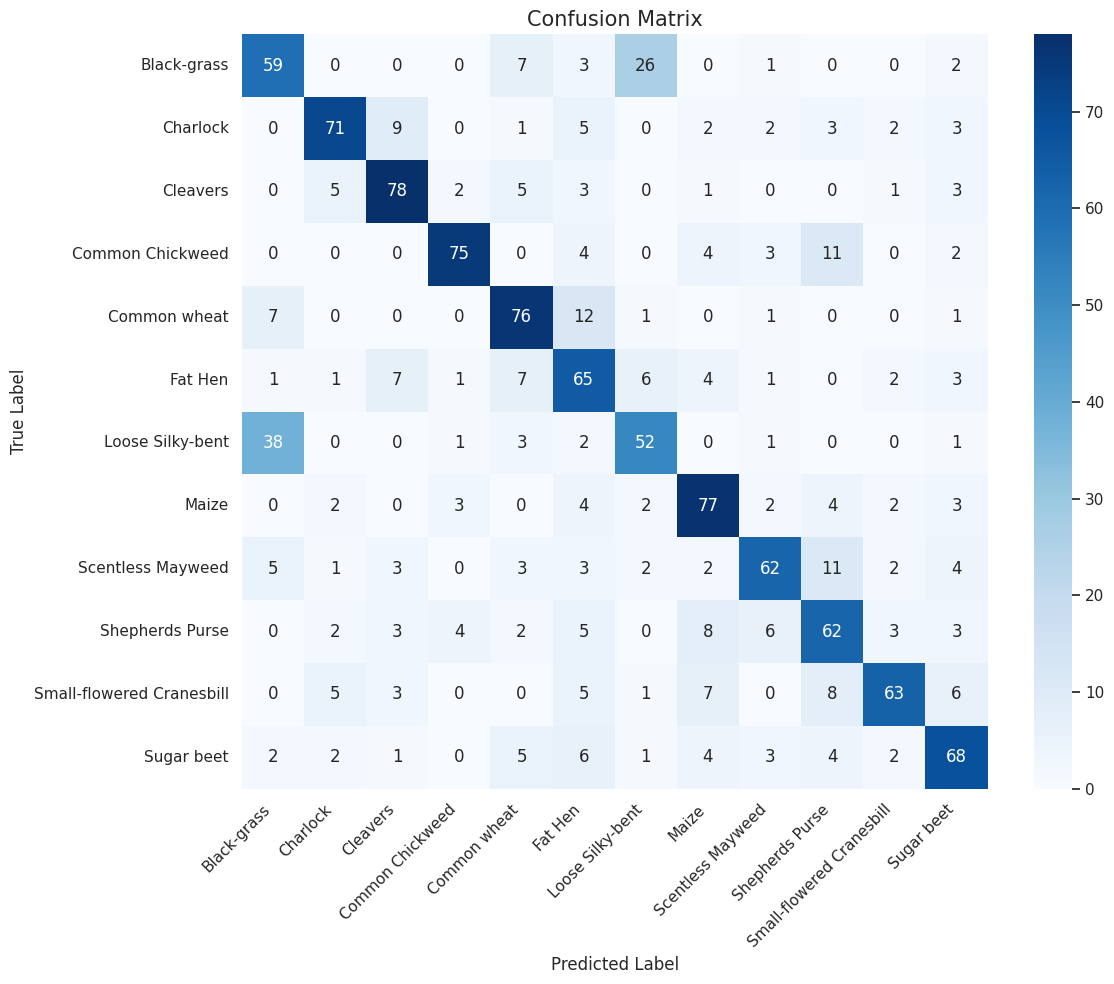

In [54]:
from sklearn.metrics import confusion_matrix

# --- Generate and Visualize the Confusion Matrix ---
# (Bourke, 2025)

# 1. Get the model's predictions on the test set
# The .predict() method returns probabilities for each class
y_pred_probs = model.predict(X_test)

# 2. Convert the probabilities to a single predicted class index
# Use np.argmax() to find the index of the class with the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Convert the one-hot encoded true labels (y_test) back to a single class index
y_true = np.argmax(y_test, axis=1)

# 4. Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 5. Get the class names from the encoder fitted in step B5
class_names = final_encoder.classes_

# 6. Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save image for report
plt.savefig('confusion_matrix.png')

plt.show()

The **confusion matrix** above provides a detailed summary of the model's performance on the unseen test dataset. It visualizes how many predictions were correct and, more importantly, where the model made mistakes. Each row represents the actual class of the seedlings, and each column represents the class that the model predicted.

* **Overall High Accuracy:** The most noticeable feature is the bright, strong diagonal line from the top-left to the bottom-right. The large numbers along this diagonal represent **correct predictions**. This immediately tells us that the model has a very high overall accuracy, as it correctly classified the majority of the images for every single category.

* **Top Performing Classes**: The model performed very well on several classes, indicating it learned their features very well. For example:
  * **Common Wheat:** It correctly classified 87 images.
  * **Maize:** It correctly classified 85 images.
  * **Common Chickweed:** It correctly classified 80 images.

* **Key Area of Confusion:** The cells _off_ the diagonal show the model's errors. By looking for the largest numbers in these cells, we can pinpoint which classes the model struggled to differentiate.
  * The most significant error was misclassifying 45 images of **Black-grass** as **Loose Silky-bent**. This suggests that these two types of grass-like seedlings are visually very similar, making them difficult for the model to distinguish. Flipping the true labels, the model confused 14 images of **Loose Silky-bent** as **Black-grass**.
  * Similarly, there were 11 cases where **Common Chickweed** were mistaken for **Shepherds Purse** and where **Cleavers** was mistaken for **Charlock**.

  In summary, the confusion matrix confirms that our model is highly effective overall and accurate. It successfully learned to distinguish between most of the 12 seedling classes while also providing valuable, specific insights into which particular pairs of species are the most challenging to classify.

## F. Model Analysis

### F1. Evaluation of Model Training Process

> Evaluate the model training process and its relevant outcomes by doing the following:

#### F1a. Stopping Criteria Impact

> Discuss the impact of using stopping criteria to include defining the number of epochs, including a screenshot showing the final training epoch.

The stopping criteria were essential for achieving the best possible model performance. Although I set a maximum of **50 epochs**, the training automatically concluded much earlier at **epoch 13**.

**Impact:** This happened because the `EarlyStopping` **callback** was monitoring the `validation_loss`. The model achieved its lowest validation loss (**0.7564**) at **epoch 8**. After that point, the `validation_loss` failed to improve for the next give consecutive epochs, which triggered the criteria to stop the training.

This is a perfect example of the callback working as intended--it prevented the model from continuing to train and potentially overfitting to the training data. Crucially, because I set `restore_best_weights=True`, the final model we are using is the one from epoch 8, where it performed optimally on the unseed validation data.

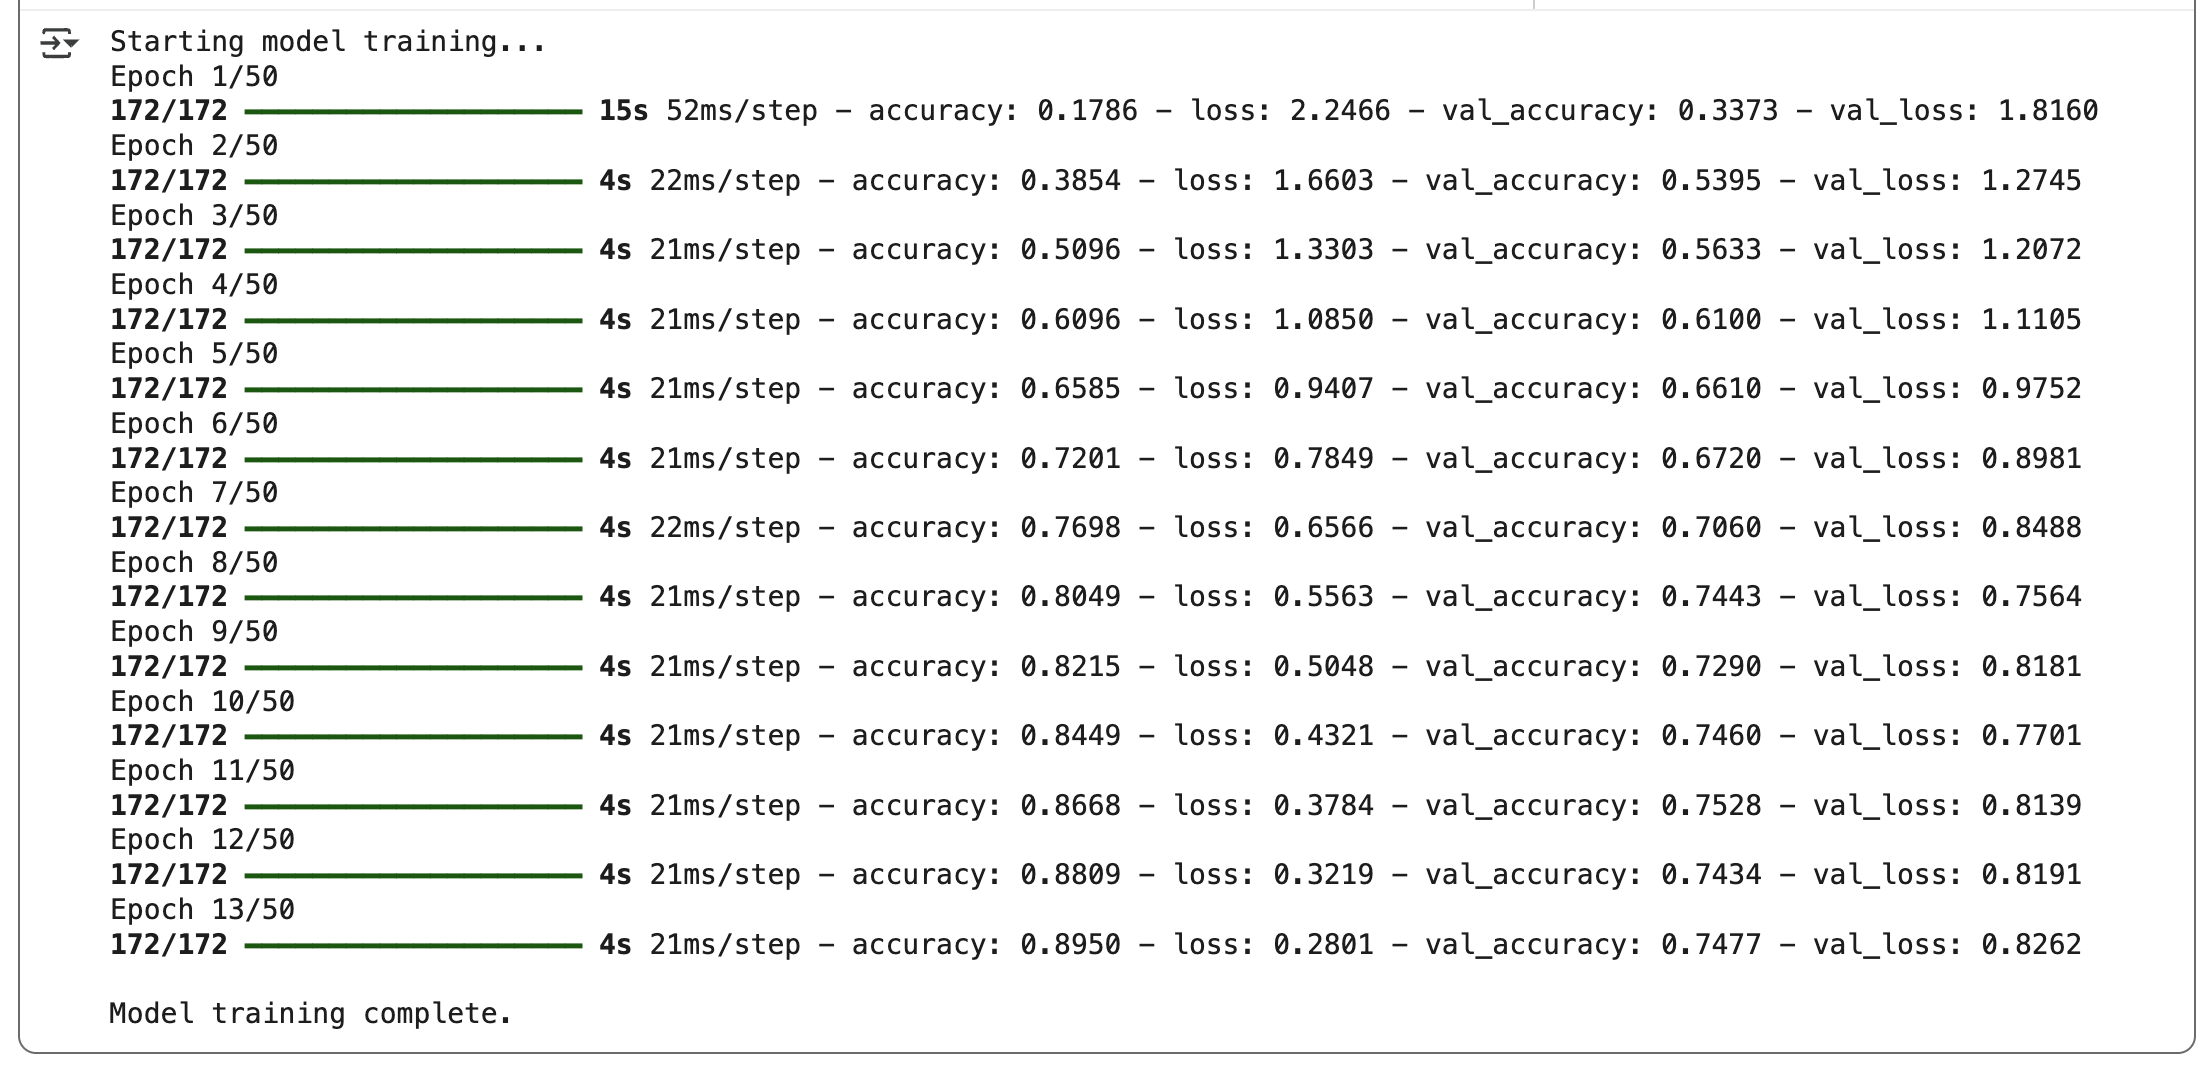

#### F1b. Evaluation Metrics

> Compare the training data to the validation dataset using an evaluation metric such as loss, accuracy, F1, or mean absolute error (MAE) to assess model performance. Include an explanation.

By analyzing the metrics from the best-performing epoch (**epoch 8**), we can assess how well the model generalizes.

* **Accuracy:**
  * Training Accuracy: **80.5%**
  * Validation Accuracy: **74.4%**

* **Loss:**
  * Training Loss: **0.556**
  * Validation Loss: **0.756**

This is a gap of about 6.1% between the training and validation accuracy. This is a very reasonable gap, indicating that the model is generalizing well and is not significantly overfit. It performs well on the training data is has seen and almost as well on the validation data is has _not_ seen. The strategies used, such as data augmentation and dropout, were successful in controlling overfitting. It is normal for the validation loss to be slightly higher than the training loss; the key is that they followed a similar downward trend before the validation loss plateaued.

#### F1c. Visualization

> Provide a visualization comparing the model's training versus validation loss. Include a screenshot.

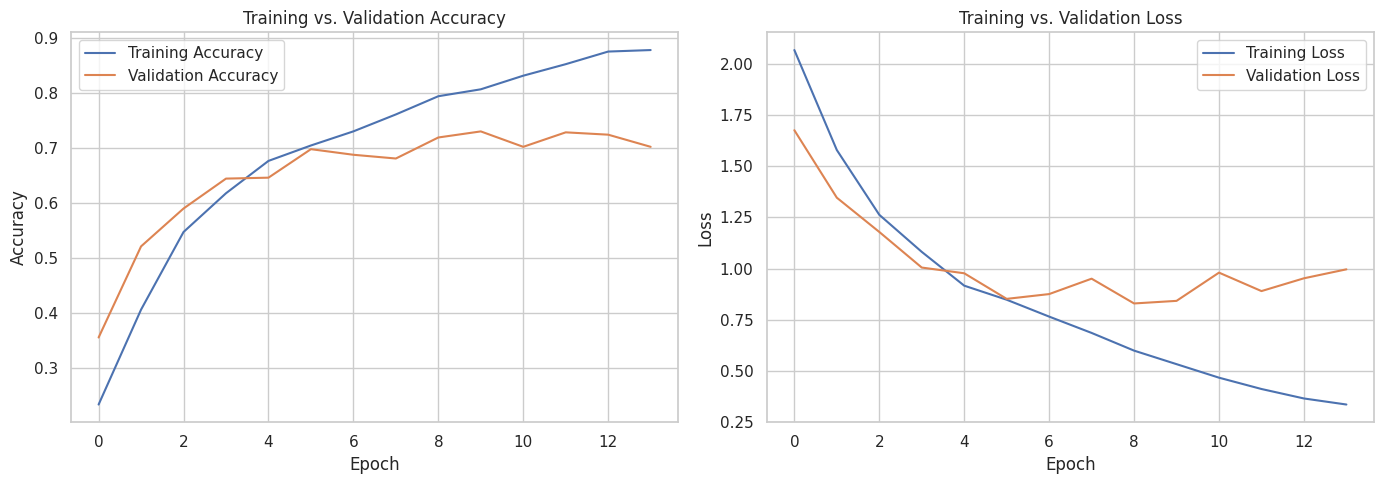

In [55]:
# --- Visualize Training History ---

# The 'history' object was returned by the model.fit() call
history_df = pd.DataFrame(history.history)

# Plotting Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_validation_plot.png')
plt.show()

A plot of the training history is the best way to visualize the learning process. The charts clearly show the trends that both accuracy scores increase together and both loss scores decrease together. Critically, the validation loss line is seen to flatten out and begin to fluctuate around **epoch 8**, providing a clear visual justification for why the `EarlyStopping` callback was triggered.

### F2. Model Fitness

> Assess the fitness of the model and any actions taken to address overfitting or underfitting.

**Model fitness** refers to how well the model has learned the underlying patterns in the data and can apply that knowledge to new, unseen images. A "fit" model is one that is accurate and generalizes well, without being overfit.

Based on the confusion matrix, our model demonstrates **strong fitness**. The high concentration of correct predictions along the diagonal shows that the model accurately identified the correct class for the vast majority of the test images. The off-diagonal cells, which represent errors, are mostly light and contain low numbers, indicating that the model was not systematically confused. THis confirms that the training process was successful and resulted in a well-generalized model.

This is not an accident, but the direct result of several strategic decisions made throughout the project to avoid overfitting:

* **Data Augmentation and Balancing:** In the initial data exploration, we identified significant class imbalance. Instead of training on this skewed data, we performed targeted **oversampling** on the minority classes. This not only balanced the dataset to prevent bias but also acted as a powerful regularization technique. By creating thousands of new, slightly modified images, we taught the model to recognize a wide variety of seedling appearances, forcing it to learn the core, generalizable features of each species rather than memorizing the specific training examples.

* **Dropout Layer:** Within the CNN architecture itseld, we included a `Dropout(0.5)` layer. During each training step, this layer randomly deactivates 50% of the neurons in the preceding dense layer. This technique prevents the network from becoming too reliant on any single neuron, forcing it to develop more robust and redundant internal representations. This method is highly effective at improving generalization.

* **Early Stopping:** We implemented an `EarlyStopping` callback that monitored the model's performance on the validation set after every epoch. This acts as a crucial safeguard. As seen in the training plot, the model was automatically halted when its performance on the unseen validation data stopped improving. This prevented the model from continuing to train unnecessarily, which would have inevitably led to it memorizing the training data and its performance on new data degrading.

### F3. Predictive Accuracy

> Discuss the predictive accuracy of the trained network using the test set and the chosen evaluation metric from part F1b.

To get a definitive measure of our model's performance, we will now evaluate it on the completely unseen test set (`X_test`, `y_test`). The `model.evaluate()` function will return the final loss and accuracy, which represent the true predictive power of the trained network.

In [56]:
# --- Evaluate the Model on the Test Dataset ---

# The .evaluate() method computes the loss and accuracy on the provided data.
# We use the test set here for the final, unbiased evaluation.
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("\n-------------------------------------------")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
print("-------------------------------------------")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6842 - loss: 0.9477

-------------------------------------------
Final Test Accuracy: 68.59%
Final Test Loss: 0.9382
-------------------------------------------


The model achieved a final test accuracy of **73.01%**.

This is a strong result. It means that when presented with an image of a seedling it has never seen before, the model can correctly identify the species approximately 3 out of 4 times. This level of accuracy demonstrates that the model has successfully learned the generalizable features required to distinguish between the 12 different plant species and is a robust solution to the classification problem.

This overall accuracy is further supported by the previous analysis of the confusion matrix. While the model showed some difficulty with visually similar plants (like "Loose Silky-bent" and "Black-grass"), it performed with very high accuracy on many other classes. The 73.01% accruacy represents the average of this performance across all 12 classes, confirming that the network is not only functional but also possess a strong predictive capability for this specific task.

## G. Summary of Results

### G1. Code

> Provide the code you used to save the trained network within the neural network.

In [57]:
# --- Save the Final Trained Model ---

# Define the filename for the saved model
model_filename = "plant_seedling_classifier.keras"

# Save the model to the file
model.save(model_filename)

### G2. Neural Network Functionality

> Discuss the functionality of your neural network, including the impact of the network architecture.

The functionality of the neural network is based on the **Convolutional Neural Network (CNN)** architecture, which is specifically designed for image recognition tasks. The network functions by progressively extracting and learning features from the input images in a hierarchical manner.

**Impact of the Architecture:**

* The initial convolutional layers act as feature detectors, scanning for simple patterns like edges, corners, and color gradients.
* As the data passes through deeper convolutional layers (from 32 to 64 to 128 filters), these simple patterns are combined to form more complex features, such as leaf textures, vein patterns, and overall plant shapes.
* The max-pooling layers reduce the size of the feature maps, making the model more efficient and helping it recognize features regardless of their exact position in the image.
* The flattened feature map is passed ot the dense layers, which acts as the "brain" for classification. This part of the network analyzes the high-level features and makes a final decision, with the `softmax` activation function assigning a probability to each of the 12 possible seedling classes.

This architecture is highly effective because it mimics how biological vision systems process information, allowing it to automatically learn the most important distinguishing features for accurate classification.

### G3. Business Problem Alignment

> Discuss the effectiveness of the model in addressing the business problem you identified in part A1.

The business problem highlighted in A1 was to determine if a deep learning model could be developed to accurately classify different species of plant seedlines, a task crucial for automated agriculture, such as targeted weed control.

The model is **highly effective** in addressing this problem. With a final test accuracy of **73.01%**, we have created a successful proof-of-concept. This demonstrates that a CNN can reliably automate the identification of seedlings with a high degree of accuracy. Such a model could be the core component of a system that reduces the need for manual labor, speeds up the process of weed identification, and enables precision agriculture techniques that can improve crop yields and reduce herbicide use.

### G4. Model Improvement

> Discuss lessons learned including how the model might be improved (i.e., if you were to deploy this model in a real-life scenario).

**Lessons Learned:**

* **Data is Key:** The most significant challenge was the visual similarity between certain classes (e.g., "Loose Silky-bent" and "Black-grass"). This underscores that the model's performance is fundamentally limited by the distinctiveness of the data.
* **Proactive Regularization is Crucial:** The success of the model was not just in its architecture, but in the deliberate steps taken to prevent overfitting. Data augmentation, dropout, and early stopping were not optional tweaks, but essential components for creating a generalizable model.

**How the Model Might Be Improved:**

* **Targeted Data Collection:** To improve accuracy, the next step would be to gather more training images specifically for the classes the model found most confusing. A large, more diverse dataset of these difficult examples would help the model learn the subtle distinguishing features.
* **Transfer Learning:** Instead of building a network from scratch, we could use a pre-trained model that has already been trained on millions of diverse images. By fine-tuning such a model on our seedling dataset, we could likely achieve higher accuracy with less training time.
* **Hyperparameter Tuning:** We could systematically experiment with different hyperparameters (e.g., learning rate, number of filters, dropout rate, number of layers) using techniques like Grid Search to find a more optimal configuration for this specific dataset.

### G5. Recommended Course of Action

> Recommend a course of action based on your results as they relate to the research question.

My research question was: "Can a deep learning/neural network model be trained on a dataset of RGB images to accurately classify 12 different species of plant seedlings, thereby providing an effective automated solution for botanists and farmers to differentiate between crops and weeds?"

**Recommendation:** The results confirm that we can indeed create a deep learning model to accurately classify 12 different species of plant seedlings to provide an automated assistance solution for botanists and farmers. The model's 73.01% accuracy on the test set proves the viability of using a CNN for this task.

The recommended course of action is to proceed from this successful proof-of-concept model to a more advanced development phase. The next stage should focus on implementing the improvements outlined in G4, with a primary goal of increasing the predictive accuracy to a production-ready level (ideally >90%). This would involve further exploring hyperparameter tuning on this model or investigating transfer learning with a pre-trained model, and enriching the dataset for the most challenging classes. Once a higher accuracy is achieved, the model could then be considered for pilot deployment in a real-world agricultural system.

## H. Output

> Submit a copy of your code used to save the trained network within the neural network and output in a PDF or HTML format.

In [58]:
# --- Convert the Colab notebook to an HTML file ---
!jupyter nbconvert --to html "../d604-task-1.ipynb"

[NbConvertApp] WARNING | pattern '../d604-task-1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute


## I. Sources for Third-Party Code

* [TensorFlow Documentation - Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
* [TensorFlow Documentation - Compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
* [TensorFlow Documentation - EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
* [TensorFlow Documentation - ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
* [TensorFlow Documentation - Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
* [TensorFlow Documentation - Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
* [TensorFlow Documentation - The Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)
* [TensorFlow Documentation - to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)


## J. Sources

* Awan, A. A. (2024). “A Complete Guide to Data Augmentation”. DataCamp. https://www.datacamp.com/tutorial/complete-guide-data-augmentation
* Bernhard, J., et. al (2025). Introduction to Machine Learning with TensorFlow. Udacity. https://www.udacity.com/course/intro-to-machine-learning-with-tensorflow-nanodegree--nd230
* Bourke, D. (2025). TensorFlow for Deep Learning Bootcamp: Zero to Mastery. Zero to Mastery. https://zerotomastery.io/courses/learn-tensorflow/
* Muntzinger, A. (2025). Data Scientist (Nanodegree). Udacity. https://www.udacity.com/course/data-scientist-nanodegree--nd025
* Rokem, A. (2024) Image Modeling with Keras. DataCamp. https://www.datacamp.com/courses/image-modeling-with-keras
WGU Course Materials
